<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#given-equilibria-positions-(from-SymPy)" data-toc-modified-id="given-equilibria-positions-(from-SymPy)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>given equilibria positions (from SymPy)</a></span></li><li><span><a href="#env" data-toc-modified-id="env-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>env</a></span><ul class="toc-item"><li><span><a href="#discrepancy-data" data-toc-modified-id="discrepancy-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>discrepancy data</a></span></li><li><span><a href="#redo-Julia-SymPy-analytical-solutions" data-toc-modified-id="redo-Julia-SymPy-analytical-solutions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>redo Julia-SymPy analytical solutions</a></span></li><li><span><a href="#plotting-custom-function" data-toc-modified-id="plotting-custom-function-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plotting custom function</a></span></li></ul></li><li><span><a href="#non-coexisting-sample" data-toc-modified-id="non-coexisting-sample-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>non-coexisting sample</a></span></li></ul></div>

# given equilibria positions (from SymPy)

Sol | ....... C ....... | ....... P ....... | ..................... B .....................
--- | --- | --- | ---
(1) | 0 | 0 | 0
(2) | $\frac{m_B}{e_{BR}e_B g_B}$ | 0 | $\frac{x}{g_B(e_{BR} - 1)}$
(3) | $\frac{e_P(e_{PR}g_P)^2}{a_P x}$ | $\frac{e_{PR}e_Pg_P}{a_P}$ | 0
(4) | $\frac{m_B}{e_{BR}e_B g_B}$ | $\frac{e_{PR}e_P g_P}{a_P}$ | $\frac{a_P m_B x - e_{BR}e_B g_B e_P(e_{PR}g_P)^2}{a_P m_B g_B(e_{BR}-1)}$

result expectation tip: only solution (3) & (4) is possible, and only solution 4 can create crashed system during integration

# env

In [1]:
import sys
import scipy as sc
from scipy import integrate as itg
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../code')
import func as fc

embedded pkg used:
1. `scipy`: array format
0. `scipy.integrate`: integration
0. `sympy`: variables rearrangements
0. `pandas`: dataframes and csv handling
0. `matplotlib`: plotting

embedded functions used:  
1. `ebcData`: ode integration
0. `ebcEqm`: model analytical calculation at system equilibrium
0. `ebcRate`: instantaneous rate of change of carbon pools
0. `ebcAlt`: summarize all possible equilibria (calculated from SymPy) in one dataframe

## discrepancy data

In [2]:
dIs = pd.read_csv("../result/discrepancy_1e-12.csv")
dIs.shape

(1234321, 13)

## redo Julia-SymPy analytical solutions

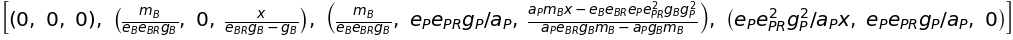

In [3]:
## env set-up
sp.init_printing()
C,P,B = sp.var("C,P,B")
x, e_PR,e_P,g_P,a_P, e_BR,e_B,g_B,m_B = sp.var("x e_PR e_P g_P a_P e_BR e_B g_B m_B",positive=True)

## equations
dC = g_P*e_PR*(1-e_P)*P +a_P*P**2 +g_B*(e_BR*(1-e_B)-1)*C*B +m_B*B -x*C
dP = g_P*e_PR*e_P*P -a_P*P**2
dB = g_B*e_BR*e_B*C*B -m_B*B

## analytical solving
sp.solve([sp.Eq(dC,0),sp.Eq(dP,0),sp.Eq(dB,0)],[C,P,B])

## plotting custom function

# non-coexisting sample

In [4]:
sAm=dIs.loc[1210890,:];sAm0=sAm[0:9];sAm

x               0.990000
e_PR            0.875000
e_P             0.630000
g_P             0.259000
a_P             0.400000
e_BR            0.600000
e_B             0.550000
g_B             0.790000
m_B             0.140000
eqmC:num-ana   -0.455293
eqmP:num-ana   -0.000066
eqmB:num-ana    2.656000
eqmA:num-ana    2.201642
Name: 1210890, dtype: float64

In [5]:
fc.ebc7(sc.array([1,1,1]),0,0,.875,.63,.259,.001,.6,.55,1.046,.14)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 